In [1]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(y_test.shape)

(10000,)


In [4]:
print(x_train.shape)

(60000, 28, 28)


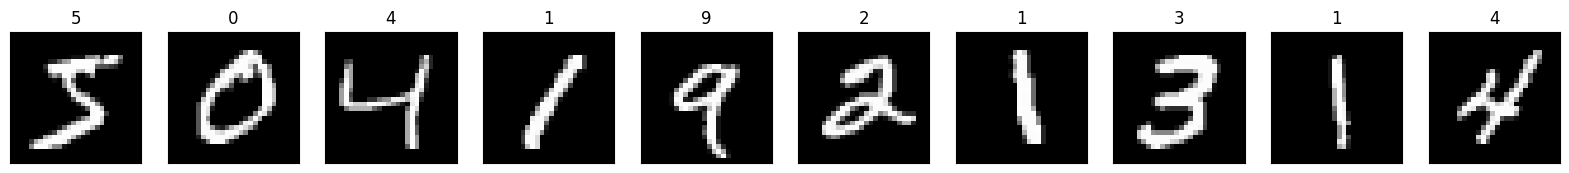

In [5]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
print(y_test.shape)

(10000, 10)


In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


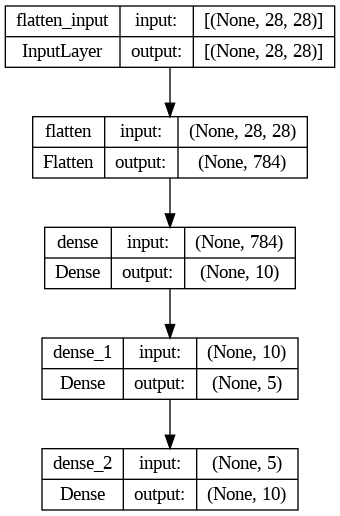

In [12]:
utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [14]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5070 - acc: 0.4780 - val_loss: 1.1357 - val_acc: 0.6391
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9699 - acc: 0.6867 - val_loss: 0.8829 - val_acc: 0.7291
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8042 - acc: 0.7596 - val_loss: 0.7455 - val_acc: 0.7833
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7389 - acc: 0.7822 - val_loss: 0.6975 - val_acc: 0.8083
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7137 - acc: 0.7963 - val_loss: 0.7508 - val_acc: 0.8035
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7004 - acc: 0.8105 - val_loss: 0.6613 - val_acc: 0.8159
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6735 - acc: 0.8123 - val_loss: 0.6717 - val_acc: 0.8154
Epoch 8/10
1875/1875 [==============================] - 5s 2ms

In [15]:
model.save('mnist_models_scifers.h5')

In [16]:
print(history.history)

{'loss': [1.506996989250183, 0.9698670506477356, 0.8041867017745972, 0.73894864320755, 0.7136805057525635, 0.7003644108772278, 0.673522412776947, 0.6332625150680542, 0.6234290599822998, 0.5861759185791016], 'acc': [0.47804999351501465, 0.6866666674613953, 0.7596166729927063, 0.7822499871253967, 0.7962666749954224, 0.8105166554450989, 0.8123000264167786, 0.8338833451271057, 0.8341333270072937, 0.8452333211898804], 'val_loss': [1.1357191801071167, 0.8829328417778015, 0.7454550862312317, 0.6974937319755554, 0.7507609128952026, 0.661284863948822, 0.6717365980148315, 0.6281898617744446, 0.6086800694465637, 0.553138017654419], 'val_acc': [0.6391000151634216, 0.7290999889373779, 0.78329998254776, 0.8083000183105469, 0.8034999966621399, 0.8159000277519226, 0.8154000043869019, 0.8266000151634216, 0.8503000140190125, 0.862500011920929]}


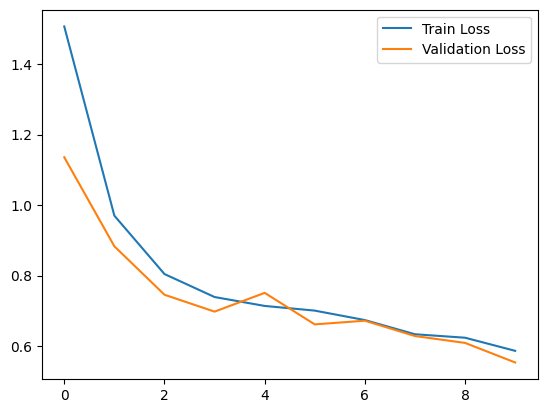

In [17]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

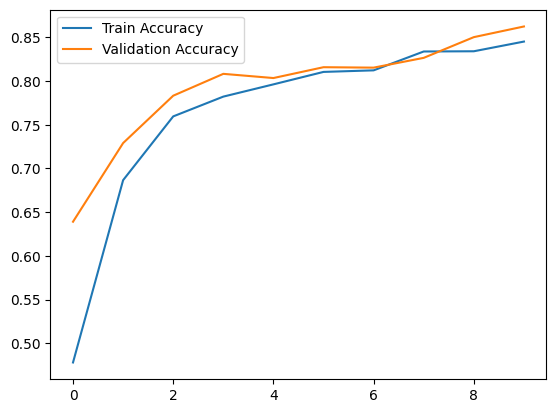

In [18]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()

In [19]:
model = tf.keras.models.load_model('mnist_models_scifers.h5')

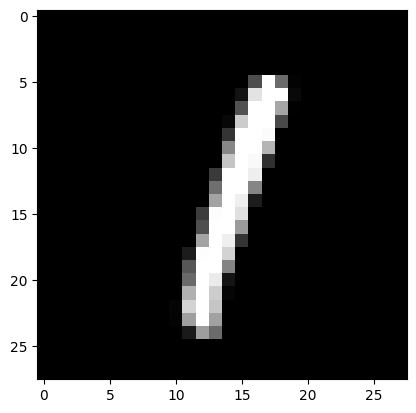

In [20]:
plt.imshow(x_test[5], cmap='gray')

In [21]:
import numpy as np
x = np.reshape(x_test[5], (1, 28, 28))
predicted_label = np.argmax(model.predict(x))
print(predicted_label)

1/1 [==============================] - 0s 85ms/step
1
